# Project: Medical Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will be analyzing data regarding 100,000 medical appointments in Brazil. This analysis will highlight several factors, which will help in predicting if a patient will show up for his/her scheduled appointment?  

#### The questions we are going to highlight in this analysis are:

> Is Age associated with patients presence for their scheduled appointment?

> Is Scholarship (Whether the patient is enrolled in Brasilian welfare program) is associated with patients presence for their scheduled appointment?

> Is Gender is associated with patients presence for their scheduled appointment?

> Is Special cases (Hipertension, Diabetes) is associated with patients presence for their scheduled appointment?



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, we will load in the data and then trim and clean the dataset for analysis. 

### General Properties

In [3]:
# Loading the data and print out a few lines.

df = pd.read_csv('No-show-appointments-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> From the table above, each row is a patient that has a unique ID and AppointmentID, and there is the Scheduled Day that shows on what day the patient set up their appointment, and we have the Appointment Day. Also, we have several characteristics about the patient like the Gender (F, M), the Age, Neighbourhood (location of the hospital), and whether or not (0 or 1) the patient is enrolled in the Brasilian welfare program.
Furthermore, the dataset includes information about 4 illnesses or conditions :Hipertension (0, 1), Diabetes (0, 1), Alcoholism (0, 1) and Handcap (0, 1, 2, 3, 4).

>The last 2 columns shows whether or not (0, 1) an SMS is received, and whether or not the patient shows up for the appointment (No-show: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up).

In [4]:
# return the dimensions (# of Rows, # of Columns) of this dataframe
df.shape

(110527, 14)

In [5]:
# return useful descriptive statistics for each column
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> From the statistics above, we can see that the majority of patients are between 18 and 55 years old, and most of them didn't have a scholarship or a condition.

In [6]:
# Display a summary of the dataframe and number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> We can see from the summery above that the dataset doesn't include any null values.

> Now we will look at the histogram of the whole dataframe.  
> The histograms agrees with what we saw in the summary statistics. 

### Data Cleaning: We will trim and clean the data to make it easier for further analysis

In [8]:
# Drop columns that will not be used in the analysis

df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# Split hybird column (ScheduledDay) to 2 columns: Date, Time respectively.

# Get the hybird in the dataframe
hb = df[df['ScheduledDay'].str.contains('T')]

In [10]:
# Create a copy of the hybird dataframe
df1 = hb.copy()
df2 = hb.copy()

In [11]:
# columns split by "T"
split_columns = ['ScheduledDay', 'AppointmentDay']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("T")[0])
    df2[c] = df2[c].apply(lambda x: x.split("T")[1])

In [12]:
df1.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
df2.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,18:38:08Z,00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,16:08:27Z,00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,16:19:04Z,00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,17:29:31Z,00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,16:07:23Z,00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
# check whether to drop the Time in the AppointmentDay column from df2
df2['AppointmentDay'].unique()

array(['00:00:00Z'], dtype=object)

In [15]:
# Drop the AppointmentDay column from df2
df2.drop(['AppointmentDay'], axis=1, inplace=True)
df2.head()

,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
# rename the ScheduledDay column in df2 to ScheduledTime
df2.rename(columns={'ScheduledDay':'ScheduledTime'}, inplace=True)
df2.head()

,Gender,ScheduledTime,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### After cleaning the dataframe we can now decide what columns will need to be used in our analysis and answering our questions.

In [17]:
# Include the columns in dataframe (df1) that we will use for further analysis
df1 = df1[['Gender','ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']]
df1.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Is Age associated with patients presence for their scheduled appointment?

In [18]:
# Create masks to filter the No-show column
# the encoding of the last column says 'No' if the patient showed up to their appointment, and 'Yes' if they did not show up.

no_show = (df1['No-show'] == 'Yes')
yes_show = (df1['No-show'] == 'No')

In [19]:
# Checking the mean age of patients who didn't attend the appointment
df1.Age[no_show].mean()

34.317666562121957

In [20]:
# Checking the mean age of patients who attended the appointment
df1.Age[yes_show].mean()

37.790064393252315

> Visualise the Age/Show data using a histogram and see whether there is a correlation between them or not.

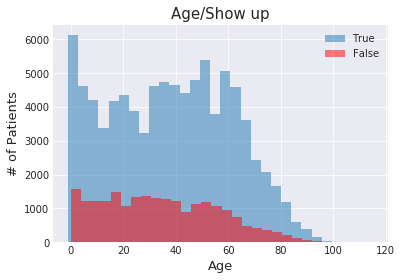

In [22]:
# Plot the Age,show hitogram.
df1.Age[yes_show].hist(label=yes_show, alpha= 0.5, bins=30)
df1.Age[no_show].hist(label=no_show, alpha= 0.5, bins=30, color='red')
plt.title('Age/Show up', fontsize=15)
plt.xlabel('Age', fontsize=13)
plt.ylabel('# of Patients', fontsize=13)
plt.legend();

> It seems that there is no correlations between the Age and the patients presence

### Research Question 2: Is Scholarship (Whether the patient is enrolled in Brasilian welfare program) is associated with patients presence for their scheduled appointment?

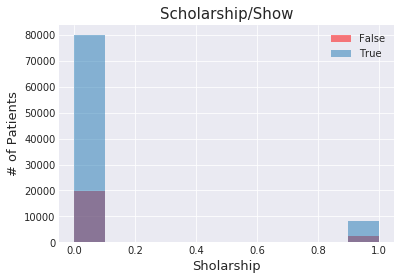

In [81]:
# Plotting the Scholarship/Show data
df1.Scholarship[no_show].hist(label=no_show, alpha= 0.5, bins=10, color='red')
df1.Scholarship[yes_show].hist(label=yes_show, alpha= 0.5, bins=10)
plt.title('Scholarship/Show', fontsize=15)
plt.xlabel('Sholarship', fontsize=13)
plt.ylabel('# of Patients',fontsize=13)
plt.legend();

In [83]:
# Check numbers of patients who have a scholarship
df1.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

> Patients with scholarship are few and so, it seems that scholarship is not a big factor for patients presence, but we can see that number of patients with scholarships who attended their appointemnts are higher that who doesn't have one.

### Research Question 3: Is Gender is associated with patients presence for their scheduled appointment?

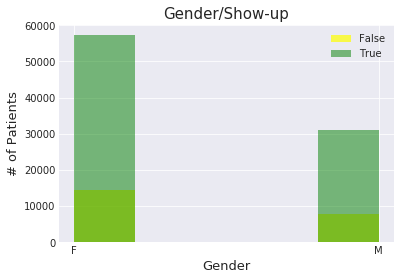

In [89]:
df1.Gender[no_show].hist(label=no_show, alpha= 0.7, bins = 5, color='yellow')
df1.Gender[yes_show].hist(label=yes_show, alpha= 0.5, bins = 5, color='green')
plt.title('Gender/Show-up', fontsize=15)
plt.xlabel('Gender', fontsize=13)
plt.ylabel('# of Patients', fontsize=13)
plt.legend();

In [87]:
df1.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [85]:
df1.Gender[no_show].value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

In [86]:
df1.Gender[yes_show].value_counts()

F    57246
M    30962
Name: Gender, dtype: int64

> After exploring the Gender data, we have more Female patients than Male patients, and the percentages of yes_show/no_show are nearly the same for both female and male and so, Gender has a weak correlation with the show-up for the appointment.

### Research Question 4: Is Special cases (Hipertension, Diabetes) is associated with patients presence for their scheduled appointment?

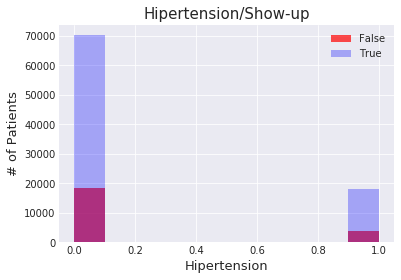

In [110]:
df1.Hipertension[no_show].hist(label= no_show, alpha= 0.7, color = 'r', bins = 10)
df1.Hipertension[yes_show].hist(label= yes_show, alpha= 0.3, color = 'b', bins = 10)
plt.title('Hipertension/Show-up', fontsize=15)
plt.xlabel('Hipertension', fontsize=13)
plt.ylabel('# of Patients', fontsize=13)
plt.legend();

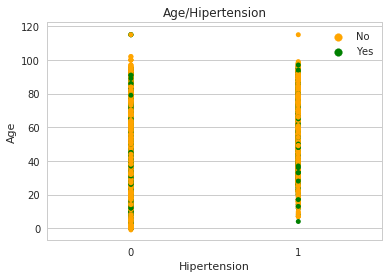

In [86]:
# Looking at Age of patients with Hipertension
set = ['orange', 'green']
sns.stripplot(x="Hipertension", y="Age", data=df1, size=5, hue="No-show", palette=set)
plt.title('Age/Hipertension')
plt.legend();

In [111]:
df1.Hipertension.value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [112]:
df1.Hipertension[no_show].value_counts()

0    18547
1     3772
Name: Hipertension, dtype: int64

In [113]:
df1.Hipertension[yes_show].value_counts()

0    70179
1    18029
Name: Hipertension, dtype: int64

> Looking at the data above it doesn't show a correlation that having a Hypertension might increase or decrease the likely of attending the appointment. 

> And so, We will look at several characteristics together and see what possible factors can affect the attendance.

In [138]:
# Looking at the 'Hipertension', 'Gender', 'No-show' columns together
df1.groupby(['Hipertension', 'Gender', 'No-show'])['Hipertension'].count()

Hipertension  Gender  No-show
0             F       No         44564
                      Yes        11937
              M       No         25615
                      Yes         6610
1             F       No         12682
                      Yes         2657
              M       No          5347
                      Yes         1115
Name: Hipertension, dtype: int64

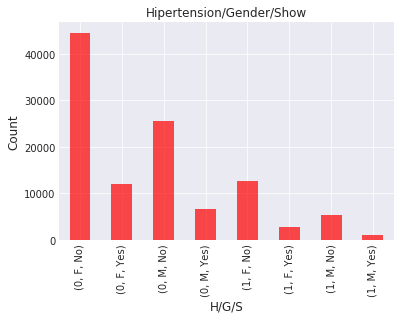

In [150]:
# Plotting all data in one bar graph
df1.groupby(['Hipertension', 'Gender', 'No-show'])['No-show'].count().plot(kind='bar', alpha= 0.7, color='red', title = 'Hipertension/Gender/Show')
plt.xlabel('H/G/S', fontsize=12)
plt.ylabel('Count', fontsize=12);

### As we can see from the graph:

>The majority of Female patients without Hipertension didn't attend the appointment.

>The majority of Male patients without Hipertension didn't attend the appointment.
   
>Female patients with Hipertension who didn't attend the appointment are more than who attended.
   
>Male patients with Hipertension who didn't attend the appointment are more than who attended.

> Generally, Patients without Hipertension are more likely to not attend the scheduled appointments.

### Now we are going to explore the relation between the Diabetes and No-show columns.

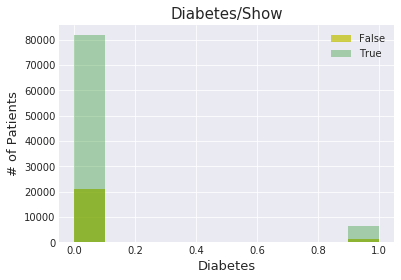

In [192]:
df1.Diabetes[no_show].hist(label=no_show, alpha= 0.7, color = 'y', bins = 10)
df1.Diabetes[yes_show].hist(label=yes_show, alpha= 0.3, color = 'g', bins = 10)
plt.title('Diabetes/Show', fontsize=15)
plt.xlabel('Diabetes', fontsize=13)
plt.ylabel('# of Patients', fontsize=13)
plt.legend();

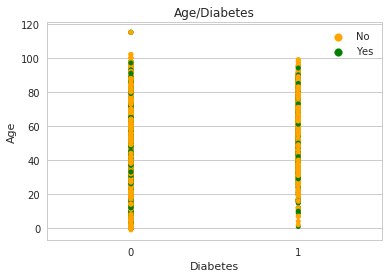

In [87]:
# Looking at Age of patients with Diabetes
sns.stripplot(x="Diabetes", y="Age", data=df1, size=5, hue="No-show", palette=set)
plt.title('Age/Diabetes')
plt.legend();

In [175]:
df1.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [176]:
df1.Diabetes[no_show].value_counts()

0    20889
1     1430
Name: Diabetes, dtype: int64

In [177]:
df1.Diabetes[yes_show].value_counts()

0    81695
1     6513
Name: Diabetes, dtype: int64

> It shows that the majority of patients don't have Diabetes, and the majority of those attended the scheduled appointment.
> While the dataset has few patients with Diabetes and the majority of this group attended the appointment.

#### Explore more relations between Diabetes and other factors together and see if they affect the presence of patients.

In [182]:
df1.groupby(['Diabetes', 'Gender', 'No-show'])['No-show'].count()

Diabetes  Gender  No-show
0         F       No         52657
                  Yes        13577
          M       No         29038
                  Yes         7312
1         F       No          4589
                  Yes         1017
          M       No          1924
                  Yes          413
Name: No-show, dtype: int64

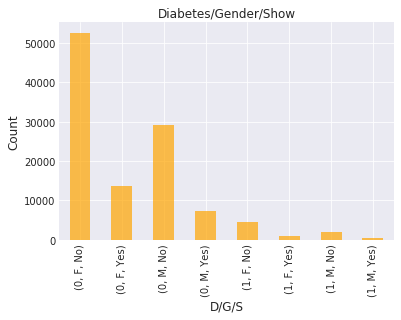

In [183]:
# Plotting all the data in one graph 
df1.groupby(['Diabetes', 'Gender','No-show'])['Gender'].count().plot(kind='bar', alpha= 0.7, color='Orange', title = 'Diabetes/Gender/Show')
plt.xlabel('D/G/S', fontsize=12)
plt.ylabel('Count', fontsize=12);

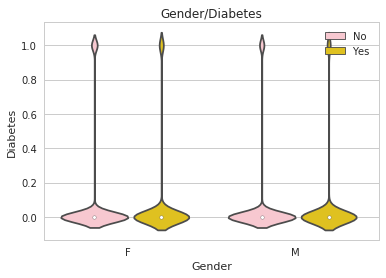

In [92]:
# Looking at patients gender with Diabetes
set2 = ['pink', 'gold']
sns.violinplot(x="Gender", y="Diabetes", data=df1, hue="No-show", palette=set2)
plt.title('Gender/Diabetes')
plt.legend();

### As we can see from the graph:

>The majority of Female patients without Diabetes didn't attend the appointment.

>Male patients without Diabetes who didn't attend the appointment are more than who did.
   
>Patients with Diabetes are very few and those who didn't attend the appointment are more than who did.

<a id='conclusions'></a>
## Conclusions

> Analyzing individual data against the No-show column didn't give a good insight to predict if a patient will show up for the scheduled appointment or not, but when we look at several factors together we can sense some pattern about what makes a patient come or not such as in the Diabetes/Gender/Show graph we saw that patients without Diabetes who didn't attend the appointment are more than those with Diabetes.

#### Limitations:

> This analysis can make use of the Appointment Time which is missing in this dataset, Scheduling Time/Day and Appointment Time/Day can be an important factor in the patients presence.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [193]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0